# Test 6.0

## Theory Question 


Question 1: Explain InceptionNet with its modules.

Question 2: Explain Residual Networks (ResNet) and discuss why they are considered advantageous compared to other architectures.

# Q1
InceptionNet is a deep convolutional neural network architecture, introduced in 2014. The key feature in InceptionNet is the Inception module, which allows the network to capture multi-scale features more efficiently and with fewer parameters compared to traditional architectures. We can perform with different filter sizes (1x1, 3x3, 5x5) and a pooling operation in parallel, and then concatenate their outputs. By using the 1x1 convolutions, Inception modules reduce the dimensionality of the input before applying more computationally expensive operations like 3x3 and 5x5 convolutions. This dimensionality reduction significantly decreases the number of parameters and computations. The parallel architecture of the Inception module allows it to capture diverse types of features while maintaining computational efficiency.
- Structure of an Inception Module:
An Inception module typically consists of the following components



1. 1x1 Convolution:
- Used for dimensionality reduction before applying more complex convolutions.- 
Helps in reducing the number of input channels, thus saving computational resources

2. 3x3 Convolution:-  
Captures medium-sized spatial features
-  
Applied after 1x1 convolutions to reduce input dimensionalit

3. 5x5 Convolution:-  
Captures larger spatial features
-  
Also applied after 1x1 convolutions to manage the number of parameters
4. Max Pooling:-  
Reduces the spatial dimensions while retaining important information
-  
Followed by a 1x1 convolution for dimensionality reduction
5. Concatenation:-  
The outputs of the 1x1, 3x3, 5x5 convolutions, and the max pooling are concatenated along the channel dimension.
.
.
.



# Q2
Residual Network or ResNet are a type of deep convolutional neural network architecture. It addressed the degradation problem, where adding more layers to a deep network leads to higher training error, by using residual connections or skip connections. This helps for training much deeper networks without the vanishing gradient problem and which helps to improve overall performance. 
There are several variants of ResNet such as ResNet-18, ResNet-34, ResNet-50 etc.

Advantages of ResNet:
- Solving the degradation problem, deeper networks usually suffer from the degradation problem and ResNet helps this by learning residuals, allowing the training of much deeper networks without performance degradation.
- Skip connections provide alternative paths for gradients to flow, preventing the vanishing gradient problem.
- Residual blocks allow for easier optimization of deep networks, enabling models with hundreds or even thousands of layers.



## Practicle Question

- Load the chess dataset
    

# Step by Step instruction

#### Step 1: Load and Prepare the Dataset using ImageDataGenerator

    Task: 
        - Load the Chessman Image Dataset from the specified directory using ImageDataGenerator. Specify the path to the dataset directory.
        - Create instances of ImageDataGenerator for training and validation, including data augmentation techniques.

        -  Generate batches of augmented image data for training and validation
            train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Traning'
                )

            validation_generator = valid_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Validation'
                )
        
#### Step 2: Define the Alexnet Architecture

    Task: 
        - Construct a basic Alexnet architecture for image classification.Start with an input layer suitable for your dataset dimensions.(use 32  kernel filters only on each layer)
        - Stack convolutional layers (Conv2D) followed by pooling layers (MaxPooling2D).
        - Add fully connected layers (Dense) at the end with appropriate activation functions.

#### Step 3: Compile the Model

    Task: 
        - Compile the ALexnet model for training.
        - Choose an appropriate optimizer (e.g., Adam).
        - Specify a loss function (e.g., categorical crossentropy) suitable for multi-class classification.
        - Add metrics to monitor during training (e.g., accuracy).

#### Step 4: Train the Model

    Task: 
        - Train the Alexnet model using the training data prepared with ImageDataGenerator.
        - Fit the model using model.fit method, passing the training generator.
        - Specify number of epochs and batch size based on computational resources and dataset size.

#### Step 5: Evaluate the Model

    Task: 
        - Evaluate the trained model on the validation data.
        - Use model.evaluate to calculate the model's performance metrics on unseen data.
        - Analyze metrics such as accuracy to assess model performance.

#### Step 6: Plot Training and Testing Loss
#### Step 7: Save the model in .h5 extension
#### Step 8: Load the model
#### Step 9: Test the model

In [1]:
#AI/ML Trainer - Saurav
#Date 14 June 2024
#Time - 12:20

In [ ]:
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Step 1: Unzip the dataset
zip_path = '/content/sport.zip'
extract_dir = '/content/sport'

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
os.listdir(extract_dir)

['Kobe Bryant', 'Kane Williamson', 'Maria Sharapova', 'Ronaldo']

In [ ]:
data_dir = extract_dir

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [ ]:
# Step 2: Prepare the dataset using ImageDataGenerator

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 399 images belonging to 4 classes.


In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = valid_datagen.flow_from_directory(
    data_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 399 images belonging to 4 classes.
Found 42 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Step 3: Define the AlexNet architecture

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

# 4th Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

# 5th Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten the layers
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# 2nd Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 55, 55, 32)        11648     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 27, 27, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 27, 27, 32)        25632     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 32)       

In [ ]:
# Step 4: Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 5: Train the model

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25
)

Epoch 1/25
12/12 [==============================] - 18s 1s/step - loss: 1.4350 - accuracy: 0.2240 - val_loss: 1.3854 - val_accuracy: 0.2500
Epoch 2/25
12/12 [==============================] - 15s 1s/step - loss: 1.3863 - accuracy: 0.2670 - val_loss: 1.3943 - val_accuracy: 0.2500
Epoch 3/25
12/12 [==============================] - 14s 1s/step - loss: 1.3680 - accuracy: 0.3161 - val_loss: 1.3425 - val_accuracy: 0.3750
Epoch 4/25
12/12 [==============================] - 15s 1s/step - loss: 1.3149 - accuracy: 0.4245 - val_loss: 1.3099 - val_accuracy: 0.4062
Epoch 5/25
12/12 [==============================] - 14s 1s/step - loss: 1.3107 - accuracy: 0.3706 - val_loss: 1.4224 - val_accuracy: 0.3750
Epoch 6/25
12/12 [==============================] - 15s 1s/step - loss: 1.3155 - accuracy: 0.3203 - val_loss: 1.2643 - val_accuracy: 0.4688
Epoch 7/25
12/12 [==============================] - 14s 1s/step - loss: 1.2538 - accuracy: 0.4305 - val_loss: 1.2644 - val_accuracy: 0.4062
Epoch 8/25
12/12 [==

In [ ]:
# Step 6: Evaluate the model

validation_loss, validation_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

1/1 [==============================] - 0s 271ms/step - loss: 0.9831 - accuracy: 0.6250
Validation Accuracy: 62.50%


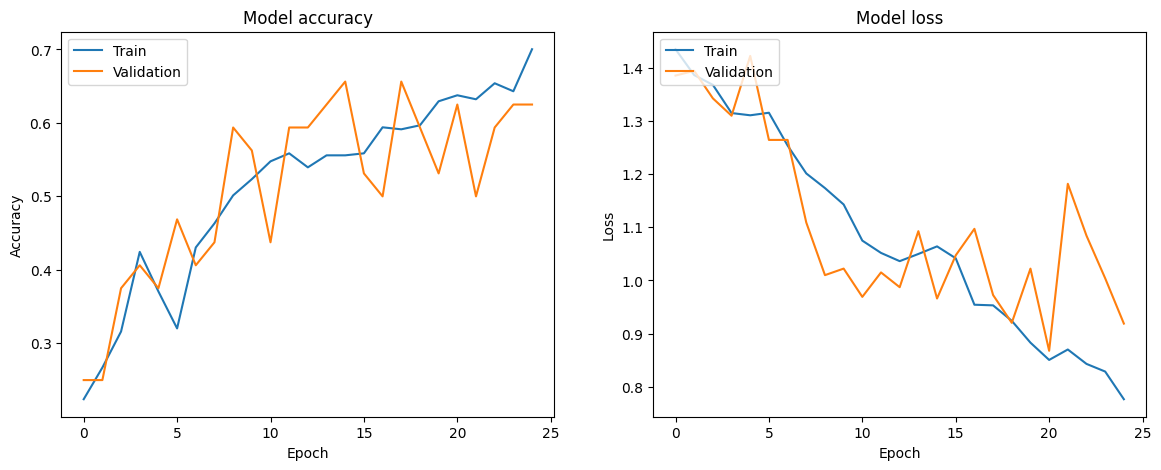

In [ ]:
import matplotlib.pyplot as plt

# Step 7: Plot training and validation accuracy/loss

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Step 8: Save the model
model.save('alexnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('alexnet_model.h5')

Validation directory: /content/sport
Class names: ['Kane Williamson', 'Kobe Bryant', 'Maria Sharapova', 'Ronaldo']
Checking directory: /content/sport
No files found in directory
Checking directory: /content/sport/Kobe Bryant
Testing image: /content/sport/Kobe Bryant/kobe_(73).jpg
Loading image: /content/sport/Kobe Bryant/kobe_(73).jpg
1/1 [==============================] - 0s 159ms/step


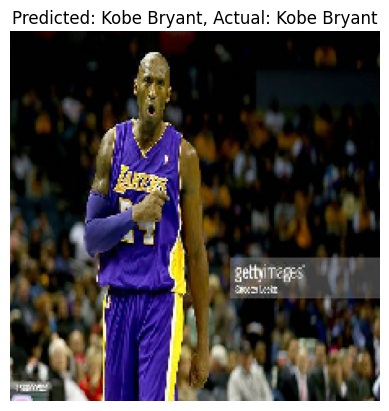

Predicted: Kobe Bryant, Actual: Kobe Bryant
Checking directory: /content/sport/Kane Williamson
Testing image: /content/sport/Kane Williamson/kane_(27).jpg
Loading image: /content/sport/Kane Williamson/kane_(27).jpg
1/1 [==============================] - 0s 65ms/step


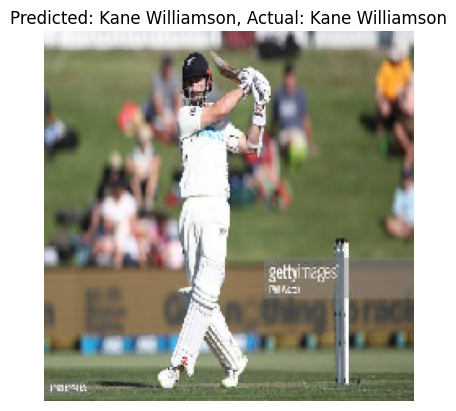

Predicted: Kane Williamson, Actual: Kane Williamson
Checking directory: /content/sport/Maria Sharapova
Testing image: /content/sport/Maria Sharapova/Sharapova_ (51).jpg
Loading image: /content/sport/Maria Sharapova/Sharapova_ (51).jpg
1/1 [==============================] - 0s 55ms/step


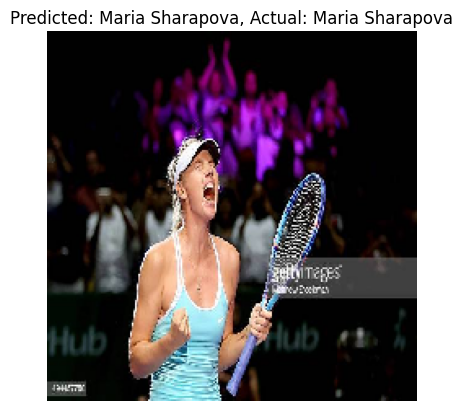

Predicted: Maria Sharapova, Actual: Maria Sharapova
Checking directory: /content/sport/Ronaldo
Testing image: /content/sport/Ronaldo/ronaldo_(106).jpg
Loading image: /content/sport/Ronaldo/ronaldo_(106).jpg
1/1 [==============================] - 0s 54ms/step


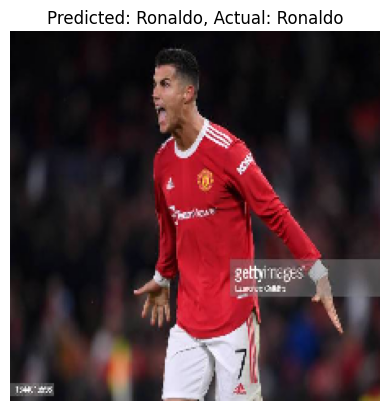

Predicted: Ronaldo, Actual: Ronaldo


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt

# Function to test a single image and display it
def test_single_image(img_path, model):
    print(f'Loading image: {img_path}')
    img = image.load_img(img_path, target_size=(227, 227))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image

    prediction = model.predict(img_array)
    return img, prediction


validation_dir = '/content/sport'
class_names = list(train_generator.class_indices.keys())

print(f'Validation directory: {validation_dir}')
print(f'Class names: {class_names}')

# Test and display images from the validation set
for root, dirs, files in os.walk(validation_dir):
    print(f'Checking directory: {root}')
    if files:
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):
                img_path = os.path.join(root, file)
                print(f'Testing image: {img_path}')
                img, prediction = test_single_image(img_path, loaded_model)
                predicted_class = class_names[np.argmax(prediction)]
                actual_class = root.split("/")[-1]

                # Display the image
                plt.imshow(img)
                plt.title(f'Predicted: {predicted_class}, Actual: {actual_class}')
                plt.axis('off')
                plt.show()

                print(f'Predicted: {predicted_class}, Actual: {actual_class}')
                break
    else:
        print('No files found in directory')
